## 키워드 분석

- 핵심어(자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구) 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 NLP를 시행한 후 자료에서 형태소 등장 빈도 등을 분석하여 핵심어 추출
- 특정 자료에 많이 나타나는 형태소가 주제를 표출할 가능성이 높다는 가정에 기초한 분석
- 빈도 분석에서 영어의 전치사나 국어의 조사와 같이 의미 없는 불용어는 제외를 권고
- 키워드 분석은 자료의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등에 사용 가능

In [1]:
# 한글 폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm

fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')

mpl.rcParams['axes.unicode_minus'] = False

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 36 not upgraded.
Need to get 9599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.

78Selecting previously unselected package fonts-nanum.
(Reading database ... 106350 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking fonts-nanum (20180306-3) ...
7Progress: [ 40%] [#######################...................................] 8Setting up fonts-nanum (20180306-3) ...
7Progress: [ 60%] [##################################........................] 87Progress: [ 80%] [##############################################............] 8Processing triggers for fontconfig (2.13.1-2ubuntu3) ...

78

In [2]:
# 국어 자연어 처리 konlpy / 형태소 분석기 MeCab
# 설

!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.4/453.4 kB 24.0 MB/s eta 0:00:00
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 20.04.4 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/etc/os-release:PRETTY_NAME="Ubuntu 20.04.4 LTS"
/etc/o

### 네이버 영화 리뷰 키워드 분석

In [3]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
raw[:5]

# Bite로 이루어져 있고, 리뷰 외 다른 데이터도 존재

[b'id\tdocument\tlabel\n',
 b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n',
 b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x

In [4]:
# 문자열 변환 및 리뷰 추출

raw = [x.decode() for x in raw[1:]]

reviews = []

for rv in raw:
    reviews.append(rv.split('\t')[1]) # [ID \t Document \t Label]
    
reviews[:5]

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']

### 형태소 분석을 통한 명사 추출

In [5]:
# Mecab을 통해 명사 추출
from konlpy.tag import Mecab
tag = Mecab()

nouns = []

for rv in reviews:
    for n in tag.nouns(rv):
        nouns.append(n)
        
nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

### 불용어(Stopwords) 사전 생성

- 형태소 분석을 통해 조사, 접속사 등 제거 가능
- 국어는 명사에도 불필요한 단어 존재하므로 사용자가 직접 불용어 사전 생성 및 추가(유지)
- 출현 빈도가 너무 잦아 분석에 방해되는 단어도 제거 (영화 리뷰의 경우 '영화')
- 예 : *전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것*

In [6]:
stopwords = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것'
stopwords = stopwords.split(' ')
stopwords

['영화',
 '전',
 '난',
 '일',
 '걸',
 '뭐',
 '줄',
 '만',
 '건',
 '분',
 '개',
 '끝',
 '잼',
 '이거',
 '번',
 '중',
 '듯',
 '때',
 '게',
 '내',
 '말',
 '나',
 '수',
 '거',
 '점',
 '것']

In [7]:
# 불용어 제거 및 형태소 분석

nouns = []

for rv in reviews:
    for n in tag.nouns(rv):
        if n not in stopwords:
            nouns.append(n)

nouns[:10]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']

### 단어 빈도수 측정

- 단어 빈도수 측정은 collections 내장 라이브러리의 Counter 함수 이용
- collections의 Counter 함수와 most_common API를 이용하여 각 단어의 빈도 수를 딕셔너리로 생성 가능

In [8]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'연기': 9175,
 '최고': 8813,
 '평점': 8514,
 '스토리': 7163,
 '생각': 6943,
 '드라마': 6896,
 '사람': 6742,
 '감동': 6489,
 '배우': 5893,
 '내용': 5731,
 '감독': 5629,
 '재미': 5479,
 '시간': 5320,
 '년': 4936,
 '사랑': 4741,
 '쓰레기': 4585,
 '작품': 3985,
 '하나': 3923,
 '정도': 3656,
 '이건': 3650,
 '마지막': 3647,
 '액션': 3568,
 '기대': 3465,
 '장면': 3262,
 '이게': 3046,
 '편': 3044,
 '최악': 3019,
 '돈': 2980,
 '이야기': 2947,
 '이해': 2745,
 '애': 2730,
 '명작': 2685,
 '여자': 2678,
 '이상': 2676,
 '처음': 2673,
 '한국': 2640,
 '주인공': 2553,
 '우리': 2531,
 '연출': 2376,
 '때문': 2371,
 '기억': 2364,
 '현실': 2193,
 '마음': 2128,
 '굿': 2110,
 '남자': 2078,
 '결말': 2066,
 '인생': 2060,
 '공포': 2048,
 '전개': 2035,
 '짜증': 2011}

### 빈도수 시각화

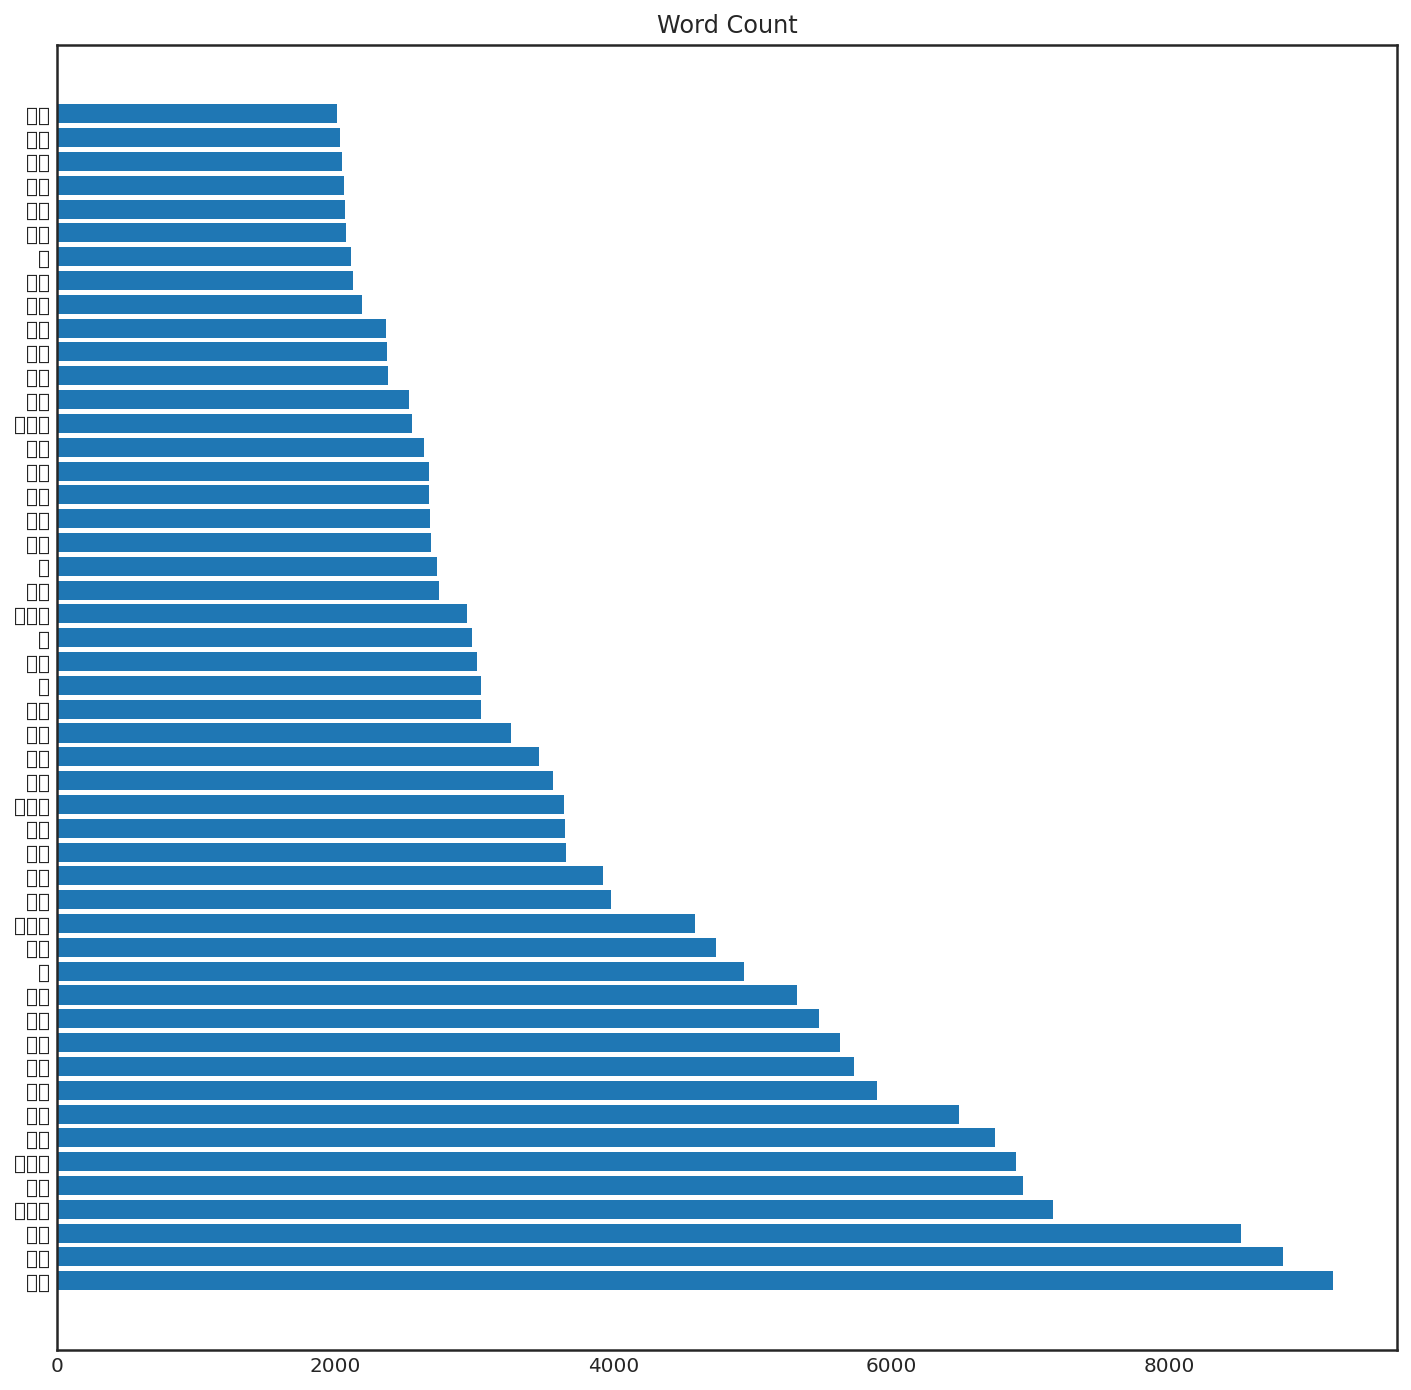

In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

y = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y, top_nouns.values())
plt.title('Word Count')
plt.yticks(y, top_nouns.keys())
plt.show();

## Word Cloud

In [10]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

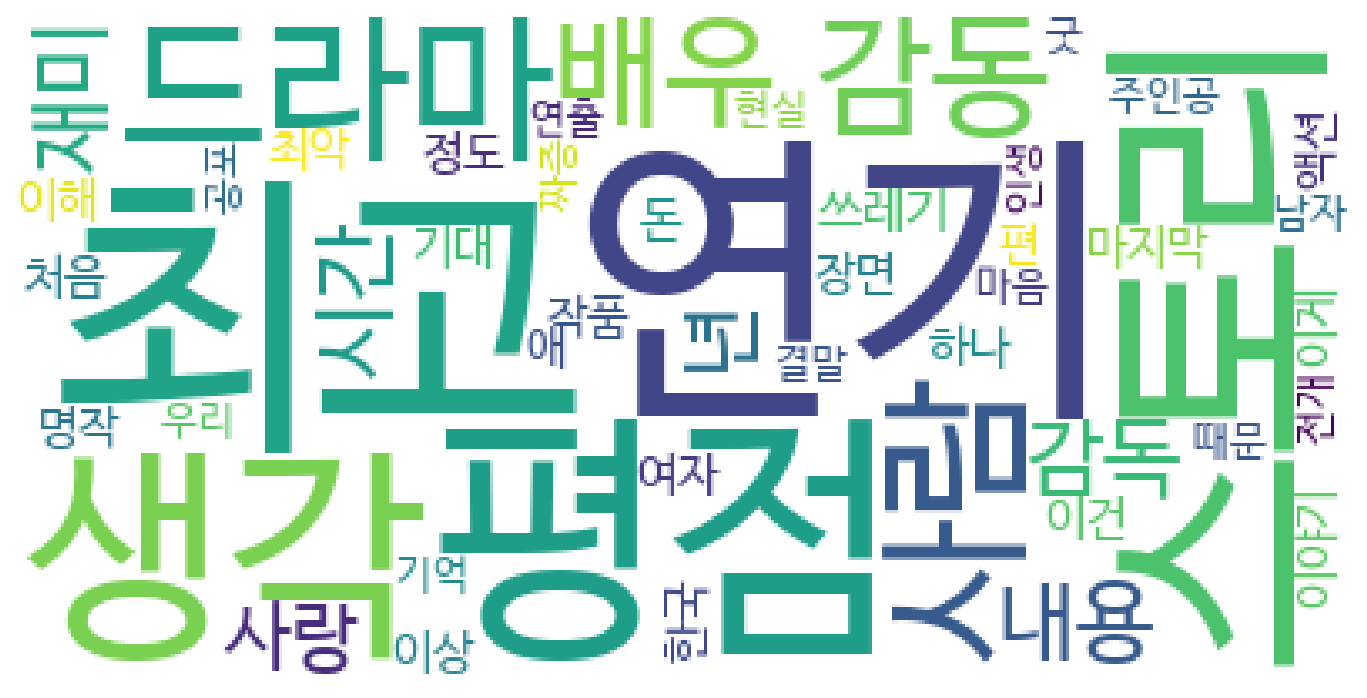

In [11]:
figure=plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc);
plt.show();

### Squarify Tree Map 시각화

- 트리맵 생성을 지원하는 라이브러리로 키워드와 키워드 빈도수를 트리맵으로 생성
- 영역, 크기, 색상으로 중요도 파악 가능

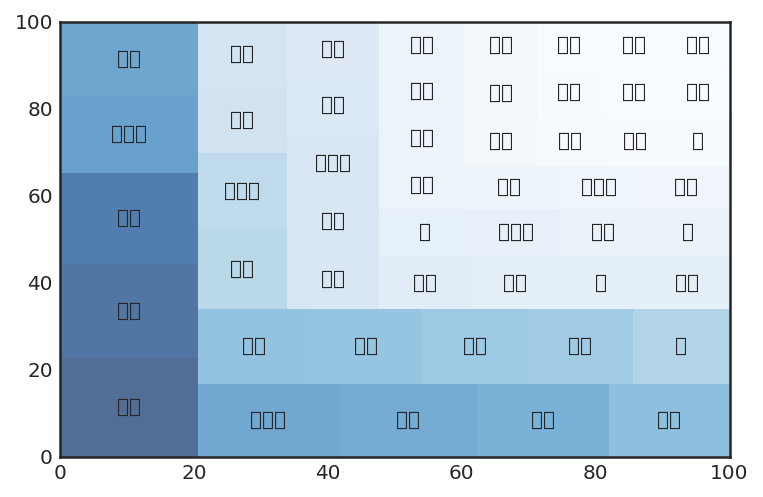

In [12]:
import squarify

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7);